# 1. Sensitivity Analysis: 2x2 

# 1.1 Net Exports

100%|██████████| 2000/2000 [00:05<00:00, 363.05it/s]


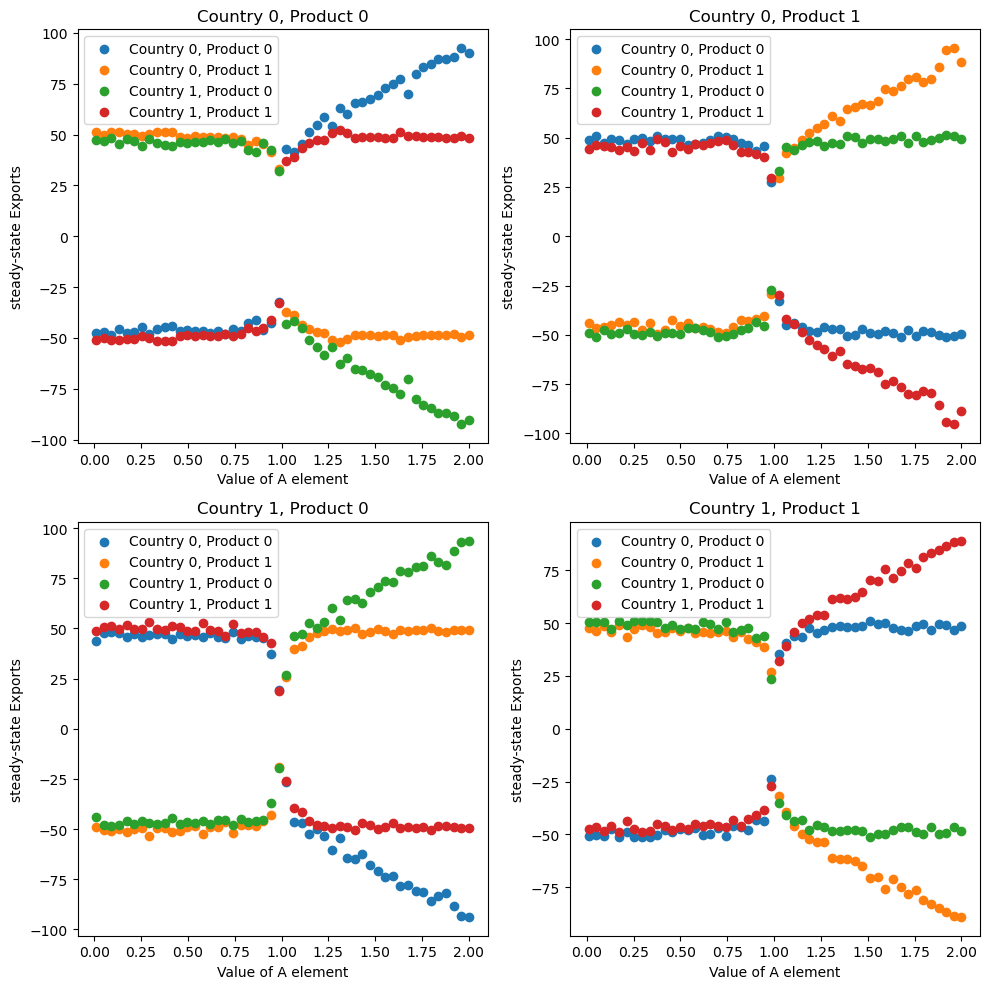

In [3]:
import numpy as np
import pandas as pd
import pickle
import random
import sys, time
from functions import production_function, regularise, wage_function, demand_function, innovate, generate_nested_matrix, visualize_multi_layer_trade_network, array_to_dataframe
from tradeutils import doAllTrades
from pricing import updatePricesAndConsume
from tqdm import tqdm
from agents_vec import gulden_vectorised
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# Constants
np.random.seed(1)
case = '2x2'
iterations = 2000
n_countries = 2
n_products = 2
countries = ['{i}'.format(i=i) for i in range(n_countries)]
products = ['{i}'.format(i=i) for i in range(n_products)]
alpha = np.ones((n_countries, n_products)) * 0.5
beta = np.ones((n_countries, n_products)) * 0.5
A_test = np.ones((n_countries, n_products))
share = np.ones(n_countries)
citizens_per_nation= [100,100]

# Parameters for the experiment
value_range = np.linspace(0.01, 2.0, 50)  # Range of values to test for each element in A
results = np.zeros((n_countries, n_products, len(value_range), n_countries*n_products))

# Run the experiment
for i in range(n_countries):
    for j in range(n_products):
        idx = i*n_products + j
        original_value = A_test[i, j]
        for k, value in enumerate(value_range):
            A_test[i, j] = value
#             print(A_test)
            _,_,ss_exports,_,_ = gulden_vectorised(case='test_o', n_countries=n_countries, n_products=n_products, countries=countries, products=products, 
                                                citizens_per_nation=citizens_per_nation, A=A_test, alpha=alpha, beta=beta, share=share, 
                                                iterations=iterations, Tr_time=1, trade_change=0.02, autarky_time=15000, pricing_algorithm='cpmu', 
                                                utility_algorithm='geometric', wage_algorithm='marginal_product', csv=False, plot=False)
            
            results[i,j,k,:] = ss_exports.flatten()
        A_test[i, j] = 1  # Reset the value after testing

# Now, plotting the matrix of scatter plots to show the results
fig = plt.figure(figsize=(10, 10))
gs = GridSpec(n_countries, n_products, figure=fig)

for i in range(n_countries):
    for j in range(n_products):
        ax = fig.add_subplot(gs[i, j])
        for n in range(n_countries*n_products):
            ax.scatter(value_range, results[i,j,:,n], label=f'Country {n // n_products}, Product {n % n_products}')
        ax.set_title(f'Country {i}, Product {j}')
        ax.set_xlabel('Value of A element')
        ax.set_ylabel('steady-state Exports')
        ax.legend()

plt.tight_layout()
plt.show()
fig.savefig('/rds/general/user/nk821/home/anaconda3/CCS/ABM/Gulden/vectorised_tests/plots/sensitivity_2x2_exports.png')

# 1.2 Total Production


In [ ]:
import numpy as np
import pandas as pd
import pickle
import random
import sys, time
from functions import production_function, regularise, wage_function, demand_function, innovate, generate_nested_matrix, visualize_multi_layer_trade_network, array_to_dataframe
from tradeutils import doAllTrades
from pricing import updatePricesAndConsume
from tqdm import tqdm
from agents_vec import gulden_vectorised
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# Constants
np.random.seed(1)
case = '2x2'
iterations = 2000
n_countries = 2
n_products = 2
countries = ['{i}'.format(i=i) for i in range(n_countries)]
products = ['{i}'.format(i=i) for i in range(n_products)]
alpha = np.ones((n_countries, n_products)) * 0.5
beta = np.ones((n_countries, n_products)) * 0.5
A_test = np.ones((n_countries, n_products))
share = np.ones(n_countries)
citizens_per_nation= [100,100]

# Parameters for the experiment
value_range = np.linspace(0.01, 2.0, 50)  # Range of values to test for each element in A
results = np.zeros((n_countries, n_products, len(value_range), n_countries*n_products))

# Run the experiment
for i in range(n_countries):
    for j in range(n_products):
        idx = i*n_products + j
        original_value = A_test[i, j]
        for k, value in enumerate(value_range):
            A_test[i, j] = value
            print(A_test)
            production,_,_,_,_ = gulden_vectorised(case='test_o', n_countries=n_countries, n_products=n_products, countries=countries, products=products, 
                                                citizens_per_nation=citizens_per_nation, A=A_test, alpha=alpha, beta=beta, share=share, 
                                                iterations=iterations, Tr_time=1, cm_time=1, trade_change=0.02, autarky_time=15000, pricing_algorithm='cpmu', 
                                                utility_algorithm='geometric', wage_algorithm='marginal_product', csv=False, plot=False)
            
            results[i,j,k,:] = production.flatten()
        A_test[i, j] = 1  # Reset the value after testing

# Now, plotting the matrix of scatter plots to show the results
fig = plt.figure(figsize=(10, 10))
gs = GridSpec(n_countries, n_products, figure=fig)

for i in range(n_countries):
    for j in range(n_products):
        ax = fig.add_subplot(gs[i, j])
        for n in range(n_countries*n_products):
            ax.scatter(value_range, results[i,j,:,n], label=f'Country {n // n_products}, Product {n % n_products}')
        ax.set_title(f'Country {i}, Product {j}')
        ax.set_xlabel('Value of A element')
        ax.set_ylabel('steady-state Production')
        ax.legend()

plt.tight_layout()
plt.show()
fig.savefig('/rds/general/user/nk821/home/anaconda3/CCS/ABM/Gulden/vectorised_tests/plots/sensitivity_2x2_production.png')

[[0.01 1.  ]
 [1.   1.  ]]


100%|██████████| 2000/2000 [00:05<00:00, 358.95it/s]


[[0.05061224 1.        ]
 [1.         1.        ]]


100%|██████████| 2000/2000 [00:05<00:00, 357.13it/s]


[[0.09122449 1.        ]
 [1.         1.        ]]


100%|██████████| 2000/2000 [00:05<00:00, 358.00it/s]


[[0.13183673 1.        ]
 [1.         1.        ]]


100%|██████████| 2000/2000 [00:05<00:00, 357.35it/s]


[[0.17244898 1.        ]
 [1.         1.        ]]


100%|██████████| 2000/2000 [00:05<00:00, 357.76it/s]


[[0.21306122 1.        ]
 [1.         1.        ]]


100%|██████████| 2000/2000 [00:05<00:00, 358.31it/s]


[[0.25367347 1.        ]
 [1.         1.        ]]


100%|██████████| 2000/2000 [00:05<00:00, 357.25it/s]


[[0.29428571 1.        ]
 [1.         1.        ]]


100%|██████████| 2000/2000 [00:05<00:00, 357.18it/s]


[[0.33489796 1.        ]
 [1.         1.        ]]


100%|██████████| 2000/2000 [00:05<00:00, 357.63it/s]


[[0.3755102 1.       ]
 [1.        1.       ]]


100%|██████████| 2000/2000 [00:05<00:00, 358.03it/s]


[[0.41612245 1.        ]
 [1.         1.        ]]


100%|██████████| 2000/2000 [00:05<00:00, 358.68it/s]


[[0.45673469 1.        ]
 [1.         1.        ]]


100%|██████████| 2000/2000 [00:05<00:00, 357.36it/s]


[[0.49734694 1.        ]
 [1.         1.        ]]


100%|██████████| 2000/2000 [00:05<00:00, 357.34it/s]


[[0.53795918 1.        ]
 [1.         1.        ]]


100%|██████████| 2000/2000 [00:05<00:00, 358.36it/s]


[[0.57857143 1.        ]
 [1.         1.        ]]


100%|██████████| 2000/2000 [00:05<00:00, 358.34it/s]


[[0.61918367 1.        ]
 [1.         1.        ]]


100%|██████████| 2000/2000 [00:05<00:00, 359.20it/s]


[[0.65979592 1.        ]
 [1.         1.        ]]


100%|██████████| 2000/2000 [00:05<00:00, 359.51it/s]


[[0.70040816 1.        ]
 [1.         1.        ]]


100%|██████████| 2000/2000 [00:05<00:00, 359.24it/s]


[[0.74102041 1.        ]
 [1.         1.        ]]


100%|██████████| 2000/2000 [00:05<00:00, 358.51it/s]


[[0.78163265 1.        ]
 [1.         1.        ]]


100%|██████████| 2000/2000 [00:05<00:00, 360.04it/s]


[[0.8222449 1.       ]
 [1.        1.       ]]


100%|██████████| 2000/2000 [00:05<00:00, 359.70it/s]


[[0.86285714 1.        ]
 [1.         1.        ]]


100%|██████████| 2000/2000 [00:05<00:00, 359.31it/s]


[[0.90346939 1.        ]
 [1.         1.        ]]


100%|██████████| 2000/2000 [00:05<00:00, 359.65it/s]


[[0.94408163 1.        ]
 [1.         1.        ]]


100%|██████████| 2000/2000 [00:05<00:00, 359.82it/s]


[[0.98469388 1.        ]
 [1.         1.        ]]


100%|██████████| 2000/2000 [00:05<00:00, 358.78it/s]


[[1.02530612 1.        ]
 [1.         1.        ]]


100%|██████████| 2000/2000 [00:05<00:00, 359.36it/s]


[[1.06591837 1.        ]
 [1.         1.        ]]


100%|██████████| 2000/2000 [00:05<00:00, 359.25it/s]


[[1.10653061 1.        ]
 [1.         1.        ]]


100%|██████████| 2000/2000 [00:05<00:00, 359.50it/s]


[[1.14714286 1.        ]
 [1.         1.        ]]


100%|██████████| 2000/2000 [00:05<00:00, 359.78it/s]


[[1.1877551 1.       ]
 [1.        1.       ]]


100%|██████████| 2000/2000 [00:05<00:00, 360.03it/s]


[[1.22836735 1.        ]
 [1.         1.        ]]


100%|██████████| 2000/2000 [00:05<00:00, 360.14it/s]


[[1.26897959 1.        ]
 [1.         1.        ]]


100%|██████████| 2000/2000 [00:05<00:00, 360.01it/s]


[[1.30959184 1.        ]
 [1.         1.        ]]


100%|██████████| 2000/2000 [00:05<00:00, 359.47it/s]


[[1.35020408 1.        ]
 [1.         1.        ]]


100%|██████████| 2000/2000 [00:05<00:00, 359.93it/s]


[[1.39081633 1.        ]
 [1.         1.        ]]


100%|██████████| 2000/2000 [00:05<00:00, 359.97it/s]


[[1.43142857 1.        ]
 [1.         1.        ]]


100%|██████████| 2000/2000 [00:05<00:00, 360.47it/s]


[[1.47204082 1.        ]
 [1.         1.        ]]


100%|██████████| 2000/2000 [00:05<00:00, 361.26it/s]


[[1.51265306 1.        ]
 [1.         1.        ]]


100%|██████████| 2000/2000 [00:05<00:00, 360.81it/s]


[[1.55326531 1.        ]
 [1.         1.        ]]


100%|██████████| 2000/2000 [00:05<00:00, 360.45it/s]


[[1.59387755 1.        ]
 [1.         1.        ]]


100%|██████████| 2000/2000 [00:05<00:00, 360.24it/s]


[[1.6344898 1.       ]
 [1.        1.       ]]


100%|██████████| 2000/2000 [00:05<00:00, 360.40it/s]


[[1.67510204 1.        ]
 [1.         1.        ]]


100%|██████████| 2000/2000 [00:05<00:00, 360.38it/s]


[[1.71571429 1.        ]
 [1.         1.        ]]


100%|██████████| 2000/2000 [00:05<00:00, 360.43it/s]


[[1.75632653 1.        ]
 [1.         1.        ]]


100%|██████████| 2000/2000 [00:05<00:00, 359.28it/s]


[[1.79693878 1.        ]
 [1.         1.        ]]


100%|██████████| 2000/2000 [00:05<00:00, 359.55it/s]


[[1.83755102 1.        ]
 [1.         1.        ]]


100%|██████████| 2000/2000 [00:05<00:00, 360.46it/s]


[[1.87816327 1.        ]
 [1.         1.        ]]


100%|██████████| 2000/2000 [00:05<00:00, 360.73it/s]


[[1.91877551 1.        ]
 [1.         1.        ]]


100%|██████████| 2000/2000 [00:05<00:00, 361.27it/s]


[[1.95938776 1.        ]
 [1.         1.        ]]


100%|██████████| 2000/2000 [00:05<00:00, 360.99it/s]


[[2. 1.]
 [1. 1.]]


100%|██████████| 2000/2000 [00:05<00:00, 361.02it/s]


[[1.   0.01]
 [1.   1.  ]]


100%|██████████| 2000/2000 [00:05<00:00, 360.77it/s]


[[1.         0.05061224]
 [1.         1.        ]]


100%|██████████| 2000/2000 [00:05<00:00, 360.68it/s]


[[1.         0.09122449]
 [1.         1.        ]]


100%|██████████| 2000/2000 [00:05<00:00, 360.71it/s]


[[1.         0.13183673]
 [1.         1.        ]]


100%|██████████| 2000/2000 [00:05<00:00, 360.98it/s]


[[1.         0.17244898]
 [1.         1.        ]]


100%|██████████| 2000/2000 [00:05<00:00, 360.28it/s]


[[1.         0.21306122]
 [1.         1.        ]]


100%|██████████| 2000/2000 [00:05<00:00, 360.56it/s]


[[1.         0.25367347]
 [1.         1.        ]]


100%|██████████| 2000/2000 [00:05<00:00, 360.11it/s]


[[1.         0.29428571]
 [1.         1.        ]]


100%|██████████| 2000/2000 [00:05<00:00, 360.71it/s]


[[1.         0.33489796]
 [1.         1.        ]]


100%|██████████| 2000/2000 [00:05<00:00, 360.37it/s]


[[1.        0.3755102]
 [1.        1.       ]]


100%|██████████| 2000/2000 [00:05<00:00, 361.01it/s]


[[1.         0.41612245]
 [1.         1.        ]]


100%|██████████| 2000/2000 [00:05<00:00, 360.10it/s]


[[1.         0.45673469]
 [1.         1.        ]]


100%|██████████| 2000/2000 [00:05<00:00, 360.63it/s]


[[1.         0.49734694]
 [1.         1.        ]]


100%|██████████| 2000/2000 [00:05<00:00, 360.16it/s]


[[1.         0.53795918]
 [1.         1.        ]]


100%|██████████| 2000/2000 [00:05<00:00, 360.37it/s]


[[1.         0.57857143]
 [1.         1.        ]]


100%|██████████| 2000/2000 [00:05<00:00, 359.80it/s]


[[1.         0.61918367]
 [1.         1.        ]]


100%|██████████| 2000/2000 [00:05<00:00, 360.60it/s]


[[1.         0.65979592]
 [1.         1.        ]]


100%|██████████| 2000/2000 [00:05<00:00, 360.33it/s]


[[1.         0.70040816]
 [1.         1.        ]]


100%|██████████| 2000/2000 [00:05<00:00, 360.52it/s]


[[1.         0.74102041]
 [1.         1.        ]]


100%|██████████| 2000/2000 [00:05<00:00, 359.95it/s]


[[1.         0.78163265]
 [1.         1.        ]]


100%|██████████| 2000/2000 [00:05<00:00, 360.37it/s]


[[1.        0.8222449]
 [1.        1.       ]]


100%|██████████| 2000/2000 [00:05<00:00, 360.24it/s]


[[1.         0.86285714]
 [1.         1.        ]]


100%|██████████| 2000/2000 [00:05<00:00, 360.42it/s]


[[1.         0.90346939]
 [1.         1.        ]]


100%|██████████| 2000/2000 [00:05<00:00, 360.31it/s]


[[1.         0.94408163]
 [1.         1.        ]]


100%|██████████| 2000/2000 [00:05<00:00, 360.58it/s]


[[1.         0.98469388]
 [1.         1.        ]]


100%|██████████| 2000/2000 [00:05<00:00, 360.21it/s]


[[1.         1.02530612]
 [1.         1.        ]]


100%|██████████| 2000/2000 [00:05<00:00, 360.33it/s]


[[1.         1.06591837]
 [1.         1.        ]]


100%|██████████| 2000/2000 [00:05<00:00, 360.04it/s]


[[1.         1.10653061]
 [1.         1.        ]]


100%|██████████| 2000/2000 [00:05<00:00, 359.94it/s]


[[1.         1.14714286]
 [1.         1.        ]]


100%|██████████| 2000/2000 [00:05<00:00, 359.98it/s]


[[1.        1.1877551]
 [1.        1.       ]]


100%|██████████| 2000/2000 [00:05<00:00, 360.80it/s]


[[1.         1.22836735]
 [1.         1.        ]]


100%|██████████| 2000/2000 [00:05<00:00, 361.03it/s]


[[1.         1.26897959]
 [1.         1.        ]]


100%|██████████| 2000/2000 [00:05<00:00, 360.80it/s]


[[1.         1.30959184]
 [1.         1.        ]]


100%|██████████| 2000/2000 [00:05<00:00, 360.81it/s]


[[1.         1.35020408]
 [1.         1.        ]]


100%|██████████| 2000/2000 [00:05<00:00, 360.82it/s]


[[1.         1.39081633]
 [1.         1.        ]]


100%|██████████| 2000/2000 [00:05<00:00, 360.84it/s]


[[1.         1.43142857]
 [1.         1.        ]]


100%|██████████| 2000/2000 [00:05<00:00, 360.54it/s]


[[1.         1.47204082]
 [1.         1.        ]]


100%|██████████| 2000/2000 [00:05<00:00, 360.96it/s]


[[1.         1.51265306]
 [1.         1.        ]]


100%|██████████| 2000/2000 [00:05<00:00, 359.99it/s]


[[1.         1.55326531]
 [1.         1.        ]]


100%|██████████| 2000/2000 [00:05<00:00, 361.61it/s]


[[1.         1.59387755]
 [1.         1.        ]]


100%|██████████| 2000/2000 [00:05<00:00, 360.52it/s]


[[1.        1.6344898]
 [1.        1.       ]]


100%|██████████| 2000/2000 [00:05<00:00, 361.35it/s]


[[1.         1.67510204]
 [1.         1.        ]]


100%|██████████| 2000/2000 [00:05<00:00, 361.19it/s]


[[1.         1.71571429]
 [1.         1.        ]]


100%|██████████| 2000/2000 [00:05<00:00, 360.63it/s]


[[1.         1.75632653]
 [1.         1.        ]]


100%|██████████| 2000/2000 [00:05<00:00, 361.05it/s]


[[1.         1.79693878]
 [1.         1.        ]]


100%|██████████| 2000/2000 [00:05<00:00, 360.86it/s]


[[1.         1.83755102]
 [1.         1.        ]]


100%|██████████| 2000/2000 [00:05<00:00, 361.63it/s]


[[1.         1.87816327]
 [1.         1.        ]]


100%|██████████| 2000/2000 [00:05<00:00, 361.23it/s]


[[1.         1.91877551]
 [1.         1.        ]]


100%|██████████| 2000/2000 [00:05<00:00, 360.36it/s]


[[1.         1.95938776]
 [1.         1.        ]]


100%|██████████| 2000/2000 [00:05<00:00, 360.22it/s]


[[1. 2.]
 [1. 1.]]


100%|██████████| 2000/2000 [00:05<00:00, 361.25it/s]


[[1.   1.  ]
 [0.01 1.  ]]


100%|██████████| 2000/2000 [00:05<00:00, 360.79it/s]


[[1.         1.        ]
 [0.05061224 1.        ]]


100%|██████████| 2000/2000 [00:05<00:00, 361.65it/s]


[[1.         1.        ]
 [0.09122449 1.        ]]


100%|██████████| 2000/2000 [00:05<00:00, 361.20it/s]


[[1.         1.        ]
 [0.13183673 1.        ]]


100%|██████████| 2000/2000 [00:05<00:00, 361.91it/s]


[[1.         1.        ]
 [0.17244898 1.        ]]


100%|██████████| 2000/2000 [00:05<00:00, 361.36it/s]


[[1.         1.        ]
 [0.21306122 1.        ]]


100%|██████████| 2000/2000 [00:05<00:00, 361.21it/s]


[[1.         1.        ]
 [0.25367347 1.        ]]


100%|██████████| 2000/2000 [00:05<00:00, 361.62it/s]


[[1.         1.        ]
 [0.29428571 1.        ]]


100%|██████████| 2000/2000 [00:05<00:00, 362.05it/s]


[[1.         1.        ]
 [0.33489796 1.        ]]


100%|██████████| 2000/2000 [00:05<00:00, 361.55it/s]


[[1.        1.       ]
 [0.3755102 1.       ]]


100%|██████████| 2000/2000 [00:05<00:00, 360.97it/s]


[[1.         1.        ]
 [0.41612245 1.        ]]


100%|██████████| 2000/2000 [00:05<00:00, 360.88it/s]


[[1.         1.        ]
 [0.45673469 1.        ]]


100%|██████████| 2000/2000 [00:05<00:00, 361.15it/s]


[[1.         1.        ]
 [0.49734694 1.        ]]


100%|██████████| 2000/2000 [00:05<00:00, 361.90it/s]


[[1.         1.        ]
 [0.53795918 1.        ]]


100%|██████████| 2000/2000 [00:05<00:00, 360.97it/s]


[[1.         1.        ]
 [0.57857143 1.        ]]


100%|██████████| 2000/2000 [00:05<00:00, 360.75it/s]


[[1.         1.        ]
 [0.61918367 1.        ]]


100%|██████████| 2000/2000 [00:05<00:00, 361.15it/s]


[[1.         1.        ]
 [0.65979592 1.        ]]


100%|██████████| 2000/2000 [00:05<00:00, 362.24it/s]


[[1.         1.        ]
 [0.70040816 1.        ]]


100%|██████████| 2000/2000 [00:05<00:00, 361.55it/s]


[[1.         1.        ]
 [0.74102041 1.        ]]


100%|██████████| 2000/2000 [00:05<00:00, 362.19it/s]


[[1.         1.        ]
 [0.78163265 1.        ]]


100%|██████████| 2000/2000 [00:05<00:00, 361.32it/s]


[[1.        1.       ]
 [0.8222449 1.       ]]


100%|██████████| 2000/2000 [00:05<00:00, 361.88it/s]


[[1.         1.        ]
 [0.86285714 1.        ]]


100%|██████████| 2000/2000 [00:05<00:00, 360.63it/s]


[[1.         1.        ]
 [0.90346939 1.        ]]


100%|██████████| 2000/2000 [00:05<00:00, 361.32it/s]


[[1.         1.        ]
 [0.94408163 1.        ]]


100%|██████████| 2000/2000 [00:05<00:00, 360.66it/s]


[[1.         1.        ]
 [0.98469388 1.        ]]


100%|██████████| 2000/2000 [00:05<00:00, 361.66it/s]


[[1.         1.        ]
 [1.02530612 1.        ]]


100%|██████████| 2000/2000 [00:05<00:00, 361.16it/s]


[[1.         1.        ]
 [1.06591837 1.        ]]


100%|██████████| 2000/2000 [00:05<00:00, 361.92it/s]


[[1.         1.        ]
 [1.10653061 1.        ]]


100%|██████████| 2000/2000 [00:05<00:00, 360.69it/s]


[[1.         1.        ]
 [1.14714286 1.        ]]


100%|██████████| 2000/2000 [00:05<00:00, 361.35it/s]


[[1.        1.       ]
 [1.1877551 1.       ]]


100%|██████████| 2000/2000 [00:05<00:00, 361.48it/s]


[[1.         1.        ]
 [1.22836735 1.        ]]


100%|██████████| 2000/2000 [00:05<00:00, 360.59it/s]


[[1.         1.        ]
 [1.26897959 1.        ]]


100%|██████████| 2000/2000 [00:05<00:00, 359.82it/s]


[[1.         1.        ]
 [1.30959184 1.        ]]


100%|██████████| 2000/2000 [00:05<00:00, 359.84it/s]


[[1.         1.        ]
 [1.35020408 1.        ]]


100%|██████████| 2000/2000 [00:05<00:00, 360.88it/s]


[[1.         1.        ]
 [1.39081633 1.        ]]


100%|██████████| 2000/2000 [00:05<00:00, 360.47it/s]


[[1.         1.        ]
 [1.43142857 1.        ]]


100%|██████████| 2000/2000 [00:05<00:00, 360.03it/s]


[[1.         1.        ]
 [1.47204082 1.        ]]


100%|██████████| 2000/2000 [00:05<00:00, 359.86it/s]


[[1.         1.        ]
 [1.51265306 1.        ]]


100%|██████████| 2000/2000 [00:05<00:00, 360.06it/s]


[[1.         1.        ]
 [1.55326531 1.        ]]


100%|██████████| 2000/2000 [00:05<00:00, 360.30it/s]


[[1.         1.        ]
 [1.59387755 1.        ]]


100%|██████████| 2000/2000 [00:05<00:00, 360.56it/s]


[[1.        1.       ]
 [1.6344898 1.       ]]


100%|██████████| 2000/2000 [00:05<00:00, 360.85it/s]


[[1.         1.        ]
 [1.67510204 1.        ]]


100%|██████████| 2000/2000 [00:05<00:00, 360.67it/s]


[[1.         1.        ]
 [1.71571429 1.        ]]


100%|██████████| 2000/2000 [00:05<00:00, 360.80it/s]


[[1.         1.        ]
 [1.75632653 1.        ]]


100%|██████████| 2000/2000 [00:05<00:00, 359.87it/s]


[[1.         1.        ]
 [1.79693878 1.        ]]


100%|██████████| 2000/2000 [00:05<00:00, 362.01it/s]


[[1.         1.        ]
 [1.83755102 1.        ]]


100%|██████████| 2000/2000 [00:05<00:00, 362.67it/s]


[[1.         1.        ]
 [1.87816327 1.        ]]


100%|██████████| 2000/2000 [00:05<00:00, 362.69it/s]


[[1.         1.        ]
 [1.91877551 1.        ]]


100%|██████████| 2000/2000 [00:05<00:00, 362.41it/s]


[[1.         1.        ]
 [1.95938776 1.        ]]


100%|██████████| 2000/2000 [00:05<00:00, 362.14it/s]


[[1. 1.]
 [2. 1.]]


100%|██████████| 2000/2000 [00:05<00:00, 362.19it/s]


[[1.   1.  ]
 [1.   0.01]]


100%|██████████| 2000/2000 [00:05<00:00, 362.47it/s]


[[1.         1.        ]
 [1.         0.05061224]]


100%|██████████| 2000/2000 [00:05<00:00, 363.54it/s]


[[1.         1.        ]
 [1.         0.09122449]]


100%|██████████| 2000/2000 [00:05<00:00, 363.25it/s]


[[1.         1.        ]
 [1.         0.13183673]]


100%|██████████| 2000/2000 [00:05<00:00, 363.24it/s]


[[1.         1.        ]
 [1.         0.17244898]]


100%|██████████| 2000/2000 [00:05<00:00, 364.53it/s]


[[1.         1.        ]
 [1.         0.21306122]]


100%|██████████| 2000/2000 [00:05<00:00, 363.90it/s]


[[1.         1.        ]
 [1.         0.25367347]]


100%|██████████| 2000/2000 [00:05<00:00, 365.11it/s]


[[1.         1.        ]
 [1.         0.29428571]]


100%|██████████| 2000/2000 [00:05<00:00, 364.84it/s]


[[1.         1.        ]
 [1.         0.33489796]]


100%|██████████| 2000/2000 [00:05<00:00, 364.71it/s]


[[1.        1.       ]
 [1.        0.3755102]]


100%|██████████| 2000/2000 [00:05<00:00, 363.96it/s]


[[1.         1.        ]
 [1.         0.41612245]]


100%|██████████| 2000/2000 [00:05<00:00, 364.98it/s]


[[1.         1.        ]
 [1.         0.45673469]]


100%|██████████| 2000/2000 [00:05<00:00, 365.33it/s]


[[1.         1.        ]
 [1.         0.49734694]]


100%|██████████| 2000/2000 [00:05<00:00, 364.33it/s]


[[1.         1.        ]
 [1.         0.53795918]]


100%|██████████| 2000/2000 [00:05<00:00, 364.81it/s]


[[1.         1.        ]
 [1.         0.57857143]]


100%|██████████| 2000/2000 [00:05<00:00, 364.74it/s]


[[1.         1.        ]
 [1.         0.61918367]]


100%|██████████| 2000/2000 [00:05<00:00, 363.98it/s]


[[1.         1.        ]
 [1.         0.65979592]]


100%|██████████| 2000/2000 [00:05<00:00, 364.60it/s]


[[1.         1.        ]
 [1.         0.70040816]]


100%|██████████| 2000/2000 [00:05<00:00, 364.70it/s]


[[1.         1.        ]
 [1.         0.74102041]]


100%|██████████| 2000/2000 [00:05<00:00, 364.72it/s]


[[1.         1.        ]
 [1.         0.78163265]]


100%|██████████| 2000/2000 [00:05<00:00, 364.37it/s]


[[1.        1.       ]
 [1.        0.8222449]]


100%|██████████| 2000/2000 [00:05<00:00, 364.39it/s]


[[1.         1.        ]
 [1.         0.86285714]]


100%|██████████| 2000/2000 [00:05<00:00, 364.78it/s]


[[1.         1.        ]
 [1.         0.90346939]]


100%|██████████| 2000/2000 [00:05<00:00, 364.26it/s]


[[1.         1.        ]
 [1.         0.94408163]]


100%|██████████| 2000/2000 [00:05<00:00, 364.69it/s]


[[1.         1.        ]
 [1.         0.98469388]]


100%|██████████| 2000/2000 [00:05<00:00, 363.96it/s]


[[1.         1.        ]
 [1.         1.02530612]]


100%|██████████| 2000/2000 [00:05<00:00, 364.05it/s]


[[1.         1.        ]
 [1.         1.06591837]]


100%|██████████| 2000/2000 [00:05<00:00, 363.31it/s]


[[1.         1.        ]
 [1.         1.10653061]]


100%|██████████| 2000/2000 [00:05<00:00, 363.23it/s]


[[1.         1.        ]
 [1.         1.14714286]]


100%|██████████| 2000/2000 [00:05<00:00, 363.36it/s]


[[1.        1.       ]
 [1.        1.1877551]]


100%|██████████| 2000/2000 [00:05<00:00, 363.68it/s]


[[1.         1.        ]
 [1.         1.22836735]]


100%|██████████| 2000/2000 [00:05<00:00, 363.81it/s]


[[1.         1.        ]
 [1.         1.26897959]]


100%|██████████| 2000/2000 [00:05<00:00, 365.09it/s]


[[1.         1.        ]
 [1.         1.30959184]]


100%|██████████| 2000/2000 [00:05<00:00, 363.87it/s]


[[1.         1.        ]
 [1.         1.35020408]]


100%|██████████| 2000/2000 [00:05<00:00, 363.45it/s]


[[1.         1.        ]
 [1.         1.39081633]]


100%|██████████| 2000/2000 [00:05<00:00, 364.56it/s]


[[1.         1.        ]
 [1.         1.43142857]]


100%|██████████| 2000/2000 [00:05<00:00, 364.16it/s]


[[1.         1.        ]
 [1.         1.47204082]]


100%|██████████| 2000/2000 [00:05<00:00, 364.39it/s]


[[1.         1.        ]
 [1.         1.51265306]]


100%|██████████| 2000/2000 [00:05<00:00, 364.53it/s]


[[1.         1.        ]
 [1.         1.55326531]]


100%|██████████| 2000/2000 [00:05<00:00, 364.03it/s]


[[1.         1.        ]
 [1.         1.59387755]]


100%|██████████| 2000/2000 [00:05<00:00, 363.87it/s]


[[1.        1.       ]
 [1.        1.6344898]]


 67%|██████▋   | 1334/2000 [00:03<00:01, 363.85it/s]

# 1.3 Net Exports - alpha

In [ ]:
import numpy as np
import pandas as pd
import pickle
import random
import sys, time
from functions import production_function, regularise, wage_function, demand_function, innovate, generate_nested_matrix, visualize_multi_layer_trade_network, array_to_dataframe
from tradeutils import doAllTrades
from pricing import updatePricesAndConsume
from tqdm import tqdm
from agents_vec import gulden_vectorised
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# Constants
np.random.seed(1)
case = '2x2'
iterations = 2000
n_countries = 2
n_products = 2
countries = ['{i}'.format(i=i) for i in range(n_countries)]
products = ['{i}'.format(i=i) for i in range(n_products)]
alpha_test = np.ones((n_countries, n_products)) * 0.5
beta = np.ones((n_countries, n_products)) * 0.5
A = np.ones((n_countries, n_products))
share = np.ones(n_countries)
citizens_per_nation= [100,100]

# Parameters for the experiment
value_range = np.linspace(0.01, 0.99, 50)  # Range of values to test for each element in A
results = np.zeros((n_countries, n_products, len(value_range), n_countries*n_products))

# Run the experiment
for i in range(n_countries):
    for j in range(n_products):
        idx = i*n_products + j
        original_value = alpha_test[i, j]
        for k, value in enumerate(value_range):
            alpha_test[i, j] = value
            print(alpha_test)
            _,_,ss_exports,_,_ = gulden_vectorised(case='test_o', n_countries=n_countries, n_products=n_products, countries=countries, products=products, 
                                                citizens_per_nation=citizens_per_nation, A=A, alpha=alpha_test, beta=beta, share=share, 
                                                iterations=iterations, Tr_time=1, cm_time=1, trade_change=0.02, autarky_time=15000, pricing_algorithm='cpmu', 
                                                utility_algorithm='geometric', wage_algorithm='marginal_product', csv=False, plot=False)
            
            results[i,j,k,:] = ss_exports.flatten()
        alpha_test[i, j] = 0.5  # Reset the value after testing

# Now, plotting the matrix of scatter plots to show the results
fig = plt.figure(figsize=(10, 10))
gs = GridSpec(n_countries, n_products, figure=fig)

for i in range(n_countries):
    for j in range(n_products):
        ax = fig.add_subplot(gs[i, j])
        for n in range(n_countries*n_products):
            ax.scatter(value_range, results[i,j,:,n], label=f'Country {n // n_products}, Product {n % n_products}')
        ax.set_title(f'Country {i}, Product {j}')
        ax.set_xlabel('alpha-{},{}'.format(i,j))
        ax.set_ylabel('steady-state Exports')
        ax.axvline(x=0.5, c='k', ls='--')
        ax.legend()

plt.tight_layout()
plt.show()
fig.savefig('/rds/general/user/nk821/home/anaconda3/CCS/ABM/Gulden/vectorised_tests/plots/sensitivity_2x2_exports_alpha.png')

# 1.4 Production - alpha

In [ ]:
import numpy as np
import pandas as pd
import pickle
import random
import sys, time
from functions import production_function, regularise, wage_function, demand_function, innovate, generate_nested_matrix, visualize_multi_layer_trade_network, array_to_dataframe
from tradeutils import doAllTrades
from pricing import updatePricesAndConsume
from tqdm import tqdm
from agents_vec import gulden_vectorised
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# Constants
np.random.seed(1)
case = '2x2'
iterations = 2000
n_countries = 2
n_products = 2
countries = ['{i}'.format(i=i) for i in range(n_countries)]
products = ['{i}'.format(i=i) for i in range(n_products)]
alpha_test = np.ones((n_countries, n_products)) * 0.5
beta = np.ones((n_countries, n_products)) * 0.5
A = np.ones((n_countries, n_products))
share = np.ones(n_countries)
citizens_per_nation= [100,100]

# Parameters for the experiment
value_range = np.linspace(0.01, 0.99, 50)  # Range of values to test for each element in A
results = np.zeros((n_countries, n_products, len(value_range), n_countries*n_products))

# Run the experiment
for i in range(n_countries):
    for j in range(n_products):
        idx = i*n_products + j
        original_value = alpha_test[i, j]
        for k, value in enumerate(value_range):
            alpha_test[i, j] = value
            print(alpha_test)
            production,_,_,_,_ = gulden_vectorised(case='test_o', n_countries=n_countries, n_products=n_products, countries=countries, products=products, 
                                                citizens_per_nation=citizens_per_nation, A=A, alpha=alpha_test, beta=beta, share=share, 
                                                iterations=iterations, Tr_time=1, cm_time=1, trade_change=0.02, autarky_time=15000, pricing_algorithm='cpmu', 
                                                utility_algorithm='geometric', wage_algorithm='marginal_product', csv=False, plot=False)
            
            results[i,j,k,:] = production.flatten()
        alpha_test[i, j] = 0.5  # Reset the value after testing

# Now, plotting the matrix of scatter plots to show the results
fig = plt.figure(figsize=(10, 10))
gs = GridSpec(n_countries, n_products, figure=fig)

for i in range(n_countries):
    for j in range(n_products):
        ax = fig.add_subplot(gs[i, j])
        for n in range(n_countries*n_products):
            ax.scatter(value_range, results[i,j,:,n], label=f'Country {n // n_products}, Product {n % n_products}')
        ax.set_title(f'Country {i}, Product {j}')
        ax.set_xlabel('alpha-{},{}'.format(i,j))
        ax.set_ylabel('steady-state Production')
        ax.axvline(x=0.5, c='k', ls='--')
        ax.legend()

plt.tight_layout()
plt.show()
fig.savefig('/rds/general/user/nk821/home/anaconda3/CCS/ABM/Gulden/vectorised_tests/plots/sensitivity_2x2_production_alpha.png')

# 1.5 Production - beta

In [ ]:
import numpy as np
import pandas as pd
import pickle
import random
import sys, time
from functions import production_function, regularise, wage_function, demand_function, innovate, generate_nested_matrix, visualize_multi_layer_trade_network, array_to_dataframe
from tradeutils import doAllTrades
from pricing import updatePricesAndConsume
from tqdm import tqdm
from agents_vec import gulden_vectorised
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# Constants
np.random.seed(1)
case = '2x2'
iterations = 2000
n_countries = 2
n_products = 2
countries = ['{i}'.format(i=i) for i in range(n_countries)]
products = ['{i}'.format(i=i) for i in range(n_products)]
alpha = np.ones((n_countries, n_products)) * 0.5
beta_test = np.ones((n_countries, n_products)) * 0.5
A = np.ones((n_countries, n_products))
share = np.ones(n_countries)
citizens_per_nation= [100,100]

# Parameters for the experiment
value_range = np.linspace(0.01, 0.99, 50)  # Range of values to test for each element in A
results = np.zeros((n_countries, n_products, len(value_range), n_countries*n_products))

# Run the experiment
for i in range(n_countries):
    for j in range(n_products):
        idx = i*n_products + j
        original_value = alpha_test[i, j]
        for k, value in enumerate(value_range):
            alpha_test[i, j] = value
#             print(beta_test)
            production, _, _, _, _ = gulden_vectorised(case='test_o', n_countries=n_countries, n_products=n_products, countries=countries, products=products, 
                                                citizens_per_nation=citizens_per_nation, A=A, alpha=alpha, beta=beta_test, share=share, 
                                                iterations=iterations, Tr_time=1, cm_time=1, trade_change=0.02, autarky_time=15000, pricing_algorithm='cpmu', 
                                                utility_algorithm='geometric', wage_algorithm='marginal_product', csv=False, plot=False)
            
            results[i,j,k,:] = production.flatten()
        beta_test[i, j] = 0.5  # Reset the value after testing

# Now, plotting the matrix of scatter plots to show the results
fig = plt.figure(figsize=(10, 10))
gs = GridSpec(n_countries, n_products, figure=fig)

for i in range(n_countries):
    for j in range(n_products):
        ax = fig.add_subplot(gs[i, j])
        for n in range(n_countries*n_products):
            ax.scatter(value_range, results[i,j,:,n], label=f'Country {n // n_products}, Product {n % n_products}')
        ax.set_title(f'Country {i}, Product {j}')
        ax.set_xlabel('beta-{},{}'.format(i,j))
        ax.set_ylabel('steady-state Production')
        ax.axvline(x=0.5, c='k', ls='--')
        ax.legend()

plt.tight_layout()
plt.show()
fig.savefig('/rds/general/user/nk821/home/anaconda3/CCS/ABM/Gulden/vectorised_tests/plots/sensitivity_2x2_production_beta.png')

# 1.6 Net exports - beta

In [ ]:
import numpy as np
import pandas as pd
import pickle
import random
import sys, time
from functions import production_function, regularise, wage_function, demand_function, innovate, generate_nested_matrix, visualize_multi_layer_trade_network, array_to_dataframe
from tradeutils import doAllTrades
from pricing import updatePricesAndConsume
from tqdm import tqdm
from agents_vec import gulden_vectorised
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# Constants
np.random.seed(1)
case = '2x2'
iterations = 2000
n_countries = 2
n_products = 2
countries = ['{i}'.format(i=i) for i in range(n_countries)]
products = ['{i}'.format(i=i) for i in range(n_products)]
alpha = np.ones((n_countries, n_products)) * 0.5
beta_test = np.ones((n_countries, n_products)) * 0.5
A = np.ones((n_countries, n_products))
share = np.ones(n_countries)
citizens_per_nation= [100,100]

# Parameters for the experiment
value_range = np.linspace(0.01, 0.99, 50)  # Range of values to test for each element in A
results = np.zeros((n_countries, n_products, len(value_range), n_countries*n_products))

# Run the experiment
for i in range(n_countries):
    for j in range(n_products):
        idx = i*n_products + j
        original_value = alpha_test[i, j]
        for k, value in enumerate(value_range):
            beta_test[i, j] = value
#             print(alph_test)
            _,_,ss_exports,_,_ = gulden_vectorised(case='test_o', n_countries=n_countries, n_products=n_products, countries=countries, products=products, 
                                                citizens_per_nation=citizens_per_nation, A=A, alpha=alpha, beta=beta_test, share=share, 
                                                iterations=iterations, Tr_time=1, cm_time=1, trade_change=0.02, autarky_time=15000, pricing_algorithm='cpmu', 
                                                utility_algorithm='geometric', wage_algorithm='marginal_product', csv=False, plot=False)
            
            results[i,j,k,:] = ss_exports.flatten()
        beta_test[i, j] = 0.5  # Reset the value after testing

# Now, plotting the matrix of scatter plots to show the results
fig = plt.figure(figsize=(10, 10))
gs = GridSpec(n_countries, n_products, figure=fig)

for i in range(n_countries):
    for j in range(n_products):
        ax = fig.add_subplot(gs[i, j])
        for n in range(n_countries*n_products):
            ax.scatter(value_range, results[i,j,:,n], label=f'Country {n // n_products}, Product {n % n_products}')
        ax.set_title(f'Country {i}, Product {j}')
        ax.set_xlabel('beta-{},{}'.format(i,j))
        ax.set_ylabel('steady-state Exports')
        ax.axvline(x=0.5, c='k', ls='--')
        ax.legend()

plt.tight_layout()
plt.show()
fig.savefig('/rds/general/user/nk821/home/anaconda3/CCS/ABM/Gulden/vectorised_tests/plots/sensitivity_2x2_exports_beta.png')

# 2. Sensitivity Analysis: 3x3


# 2.1 Net Exports - A

In [ ]:
import numpy as np
import pandas as pd
import pickle
import random
import sys, time
from functions import production_function, regularise, wage_function, demand_function, innovate, generate_nested_matrix, visualize_multi_layer_trade_network, array_to_dataframe
from tradeutils import doAllTrades
from pricing import updatePricesAndConsume
from tqdm import tqdm
from agents_vec import gulden_vectorised
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# Constants
np.random.seed(1)
case = '3x3'
iterations = 2000
n_countries = 3
n_products = 3
countries = ['{i}'.format(i=i) for i in range(n_countries)]
products = ['{i}'.format(i=i) for i in range(n_products)]
alpha = np.ones((n_countries, n_products)) * 0.5
beta = np.ones((n_countries, n_products)) * 0.5
A_test = np.ones((n_countries, n_products))
share = np.ones(n_countries)
citizens_per_nation= [100,100,100]

# Parameters for the experiment
value_range = np.linspace(0.01, 2.0, 50)  # Range of values to test for each element in A
results = np.zeros((n_countries, n_products, len(value_range), n_countries*n_products))

# Run the experiment
for i in range(n_countries):
    for j in range(n_products):
        idx = i*n_products + j
        original_value = A_test[i, j]
        for k, value in enumerate(value_range):
            A_test[i, j] = value
            print(A_test)
            _,_,ss_exports,_,_ = gulden_vectorised(case='test_o', n_countries=n_countries, n_products=n_products, countries=countries, products=products, 
                                                citizens_per_nation=citizens_per_nation, A=A_test, alpha=alpha, beta=beta, share=share, 
                                                iterations=iterations, Tr_time=1, cm_time=1, trade_change=0.02, autarky_time=15000, pricing_algorithm='cpmu', 
                                                utility_algorithm='geometric', wage_algorithm='marginal_product', csv=False, plot=False)
            
            results[i,j,k,:] = ss_exports.flatten()
        A_test[i, j] = 1  # Reset the value after testing

# Now, plotting the matrix of scatter plots to show the results
fig = plt.figure(figsize=(10, 10))
gs = GridSpec(n_countries, n_products, figure=fig)

for i in range(n_countries):
    for j in range(n_products):
        ax = fig.add_subplot(gs[i, j])
        for n in range(n_countries*n_products):
            ax.scatter(value_range, results[i,j,:,n], label=f'Country {n // n_products}, Product {n % n_products}')
        ax.set_title(f'Country {i}, Product {j}')
        ax.set_xlabel('Value of A element')
        ax.set_ylabel('steady-state Exports')
        ax.legend()

plt.tight_layout()
plt.show()
fig.savefig('/rds/general/user/nk821/home/anaconda3/CCS/ABM/Gulden/vectorised_tests/plots/sensitivity_3x3_exports.png')

# 2.2 Total Production - A

In [ ]:
import numpy as np
import pandas as pd
import pickle
import random
import sys, time
from functions import production_function, regularise, wage_function, demand_function, innovate, generate_nested_matrix, visualize_multi_layer_trade_network, array_to_dataframe
from tradeutils import doAllTrades
from pricing import updatePricesAndConsume
from tqdm import tqdm
from agents_vec import gulden_vectorised
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# Constants
np.random.seed(1)
case = '3x3'
iterations = 2000
n_countries = 3
n_products = 3
countries = ['{i}'.format(i=i) for i in range(n_countries)]
products = ['{i}'.format(i=i) for i in range(n_products)]
alpha = np.ones((n_countries, n_products)) * 0.5
beta = np.ones((n_countries, n_products)) * 0.5
A_test = np.ones((n_countries, n_products))
share = np.ones(n_countries)
citizens_per_nation= [100,100,100]

# Parameters for the experiment
value_range = np.linspace(0.01, 2.0, 50)  # Range of values to test for each element in A
results = np.zeros((n_countries, n_products, len(value_range), n_countries*n_products))

# Run the experiment
for i in range(n_countries):
    for j in range(n_products):
        idx = i*n_products + j
        original_value = A_test[i, j]
        for k, value in enumerate(value_range):
            A_test[i, j] = value
            print(A_test)
            production,_,_,_,_ = gulden_vectorised(case='test_o', n_countries=n_countries, n_products=n_products, countries=countries, products=products, 
                                                citizens_per_nation=citizens_per_nation, A=A_test, alpha=alpha, beta=beta, share=share, 
                                                iterations=iterations, Tr_time=1, cm_time=1, trade_change=0.02, autarky_time=15000, pricing_algorithm='cpmu', 
                                                utility_algorithm='geometric', wage_algorithm='marginal_product', csv=False, plot=False)
            
            results[i,j,k,:] = production.flatten()
        A_test[i, j] = 1  # Reset the value after testing

# Now, plotting the matrix of scatter plots to show the results
fig = plt.figure(figsize=(10, 10))
gs = GridSpec(n_countries, n_products, figure=fig)

for i in range(n_countries):
    for j in range(n_products):
        ax = fig.add_subplot(gs[i, j])
        for n in range(n_countries*n_products):
            ax.scatter(value_range, results[i,j,:,n], label=f'Country {n // n_products}, Product {n % n_products}')
        ax.set_title(f'Country {i}, Product {j}')
        ax.set_xlabel('Value of A element')
        ax.set_ylabel('steady-state Production')
        ax.legend()

plt.tight_layout()
plt.show()
fig.savefig('/rds/general/user/nk821/home/anaconda3/CCS/ABM/Gulden/vectorised_tests/plots/sensitivity_3x3_production.png')